CNN as feature extractor

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Model

from tensorflow.keras.applications.resnet import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image

In [ ]:
!wget http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
!gunzip cars_train.tgz

--2022-11-16 10:48:38--  http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  17.7MB/s    in 61s     

2022-11-16 10:49:39 (15.3 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]



In [ ]:
model = ResNet50(input_shape=None)

102967424/102967424 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
img_path = '/content/cars_train/00004.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:\n', decode_predictions(preds))

features = model.predict(x)
layer_3 = Model(inputs= model.input, outputs= model.get_layer('pool1_pool').output)
# layer_2 = Model(inputs= model.input, outputs= model.get_layer('conv4_block1_out').output)
# layer_3 = Model(inputs= model.input, outputs= model.get_layer('conv4_block5_out').output)

1/1 [==============================] - 0s 179ms/step
Predicted:
 [[('n02814533', 'beach_wagon', 0.24862884), ('n04285008', 'sports_car', 0.18005985), ('n03930630', 'pickup', 0.13977613), ('n03100240', 'convertible', 0.10896401), ('n03770679', 'minivan', 0.098819464)]]
1/1 [==============================] - 0s 155ms/step


In [ ]:
pip install keract

input_1 (1, 224, 224, 3) 


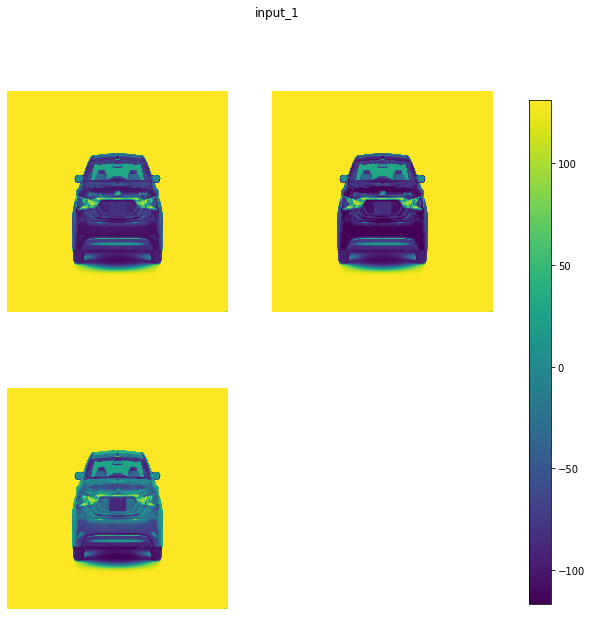

conv1_pad (1, 230, 230, 3) 


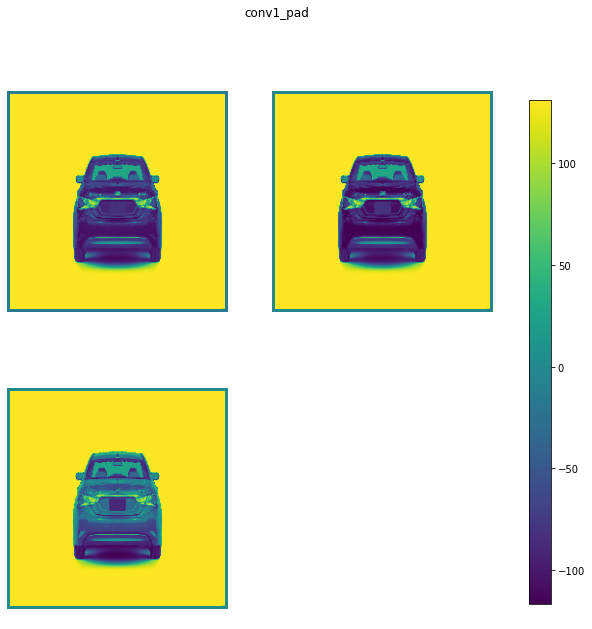

conv1_conv (1, 112, 112, 64) 


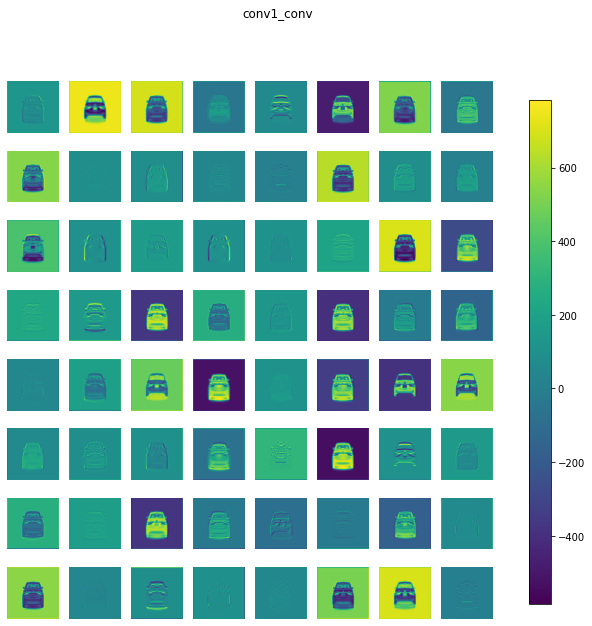

conv1_bn (1, 112, 112, 64) 


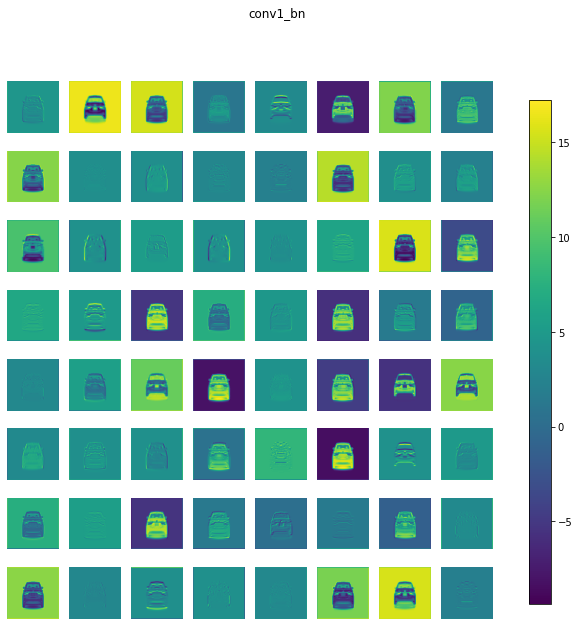

conv1_relu (1, 112, 112, 64) 


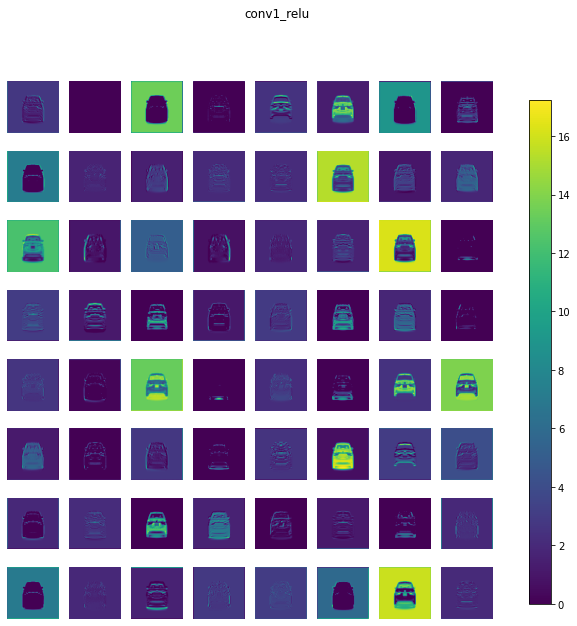

pool1_pad (1, 114, 114, 64) 


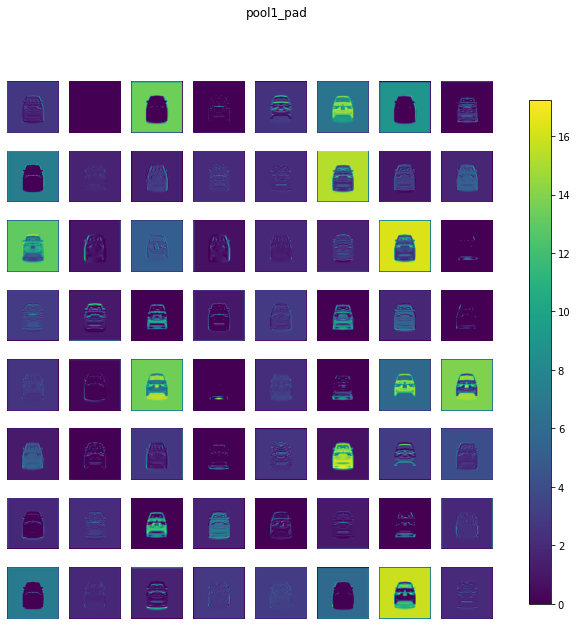

pool1_pool (1, 56, 56, 64) 


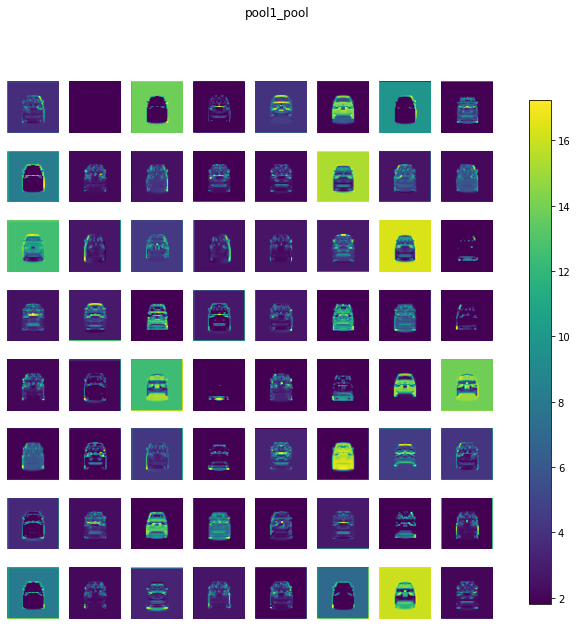

In [ ]:
from keract import get_activations
from keract import display_activations

activations = get_activations(layer_3, x)
display_activations(activations, save=False, fig_size=(10, 10))

1/1 [==============================] - 0s 167ms/step
input_1 (1, 224, 224, 3) 


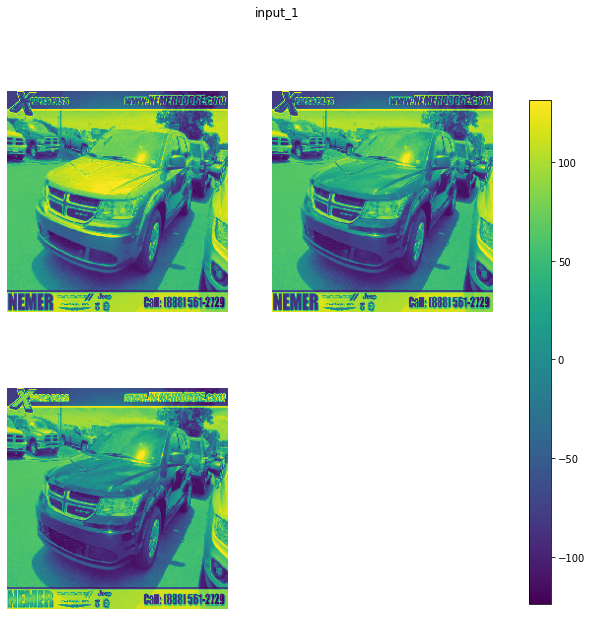

conv1_pad (1, 230, 230, 3) 


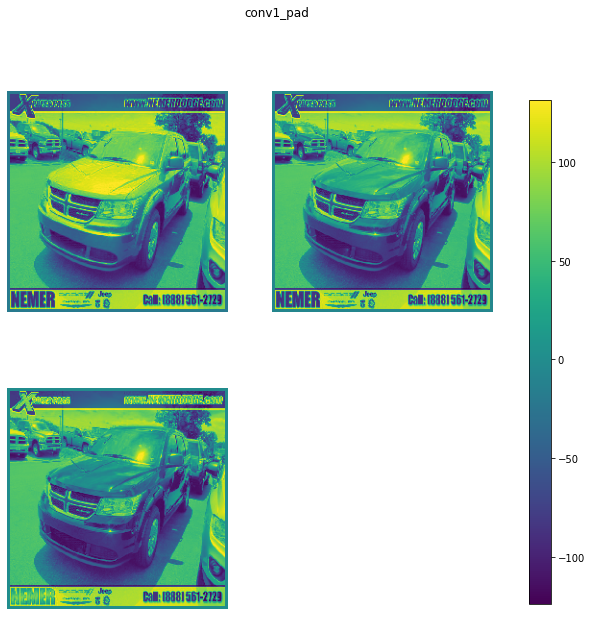

conv1_conv (1, 112, 112, 64) 


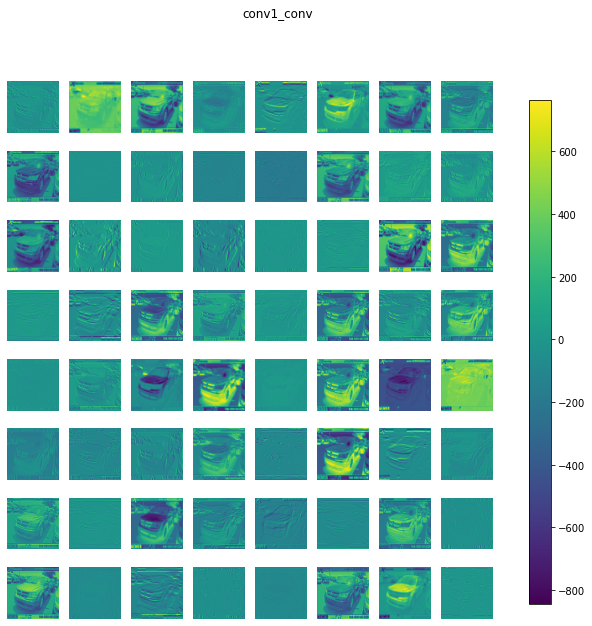

conv1_bn (1, 112, 112, 64) 


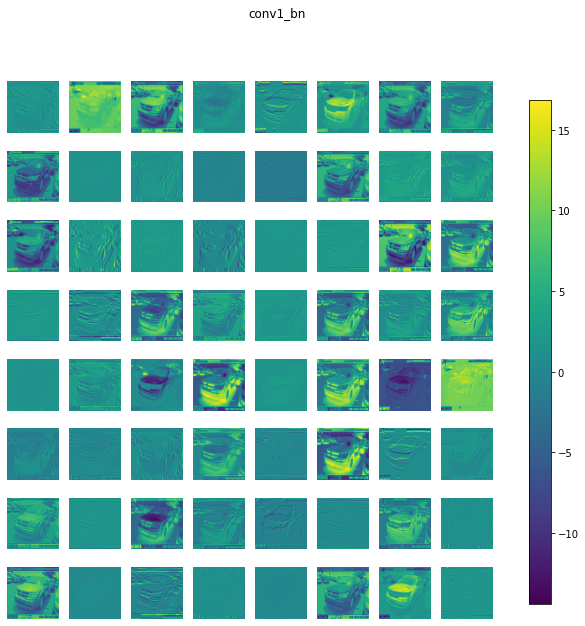

conv1_relu (1, 112, 112, 64) 


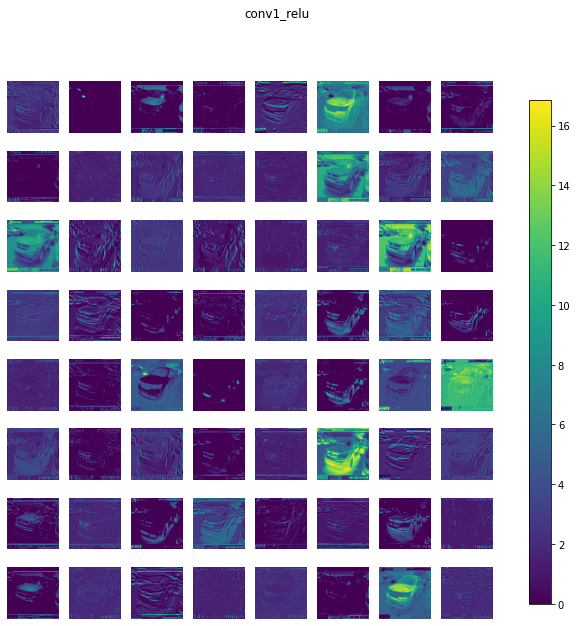

pool1_pad (1, 114, 114, 64) 


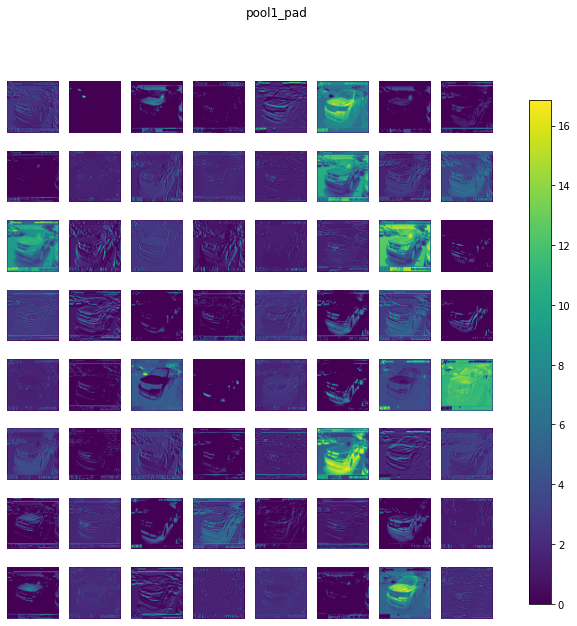

pool1_pool (1, 56, 56, 64) 


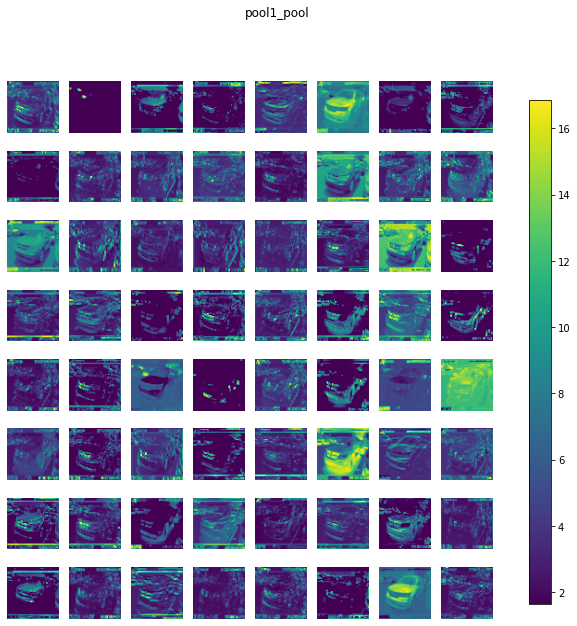

In [ ]:
img_path = '/content/cars_train/00007.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
layer_3 = Model(inputs= model.input, outputs= model.get_layer('pool1_pool').output)

activations = get_activations(layer_3, x)
display_activations(activations, save=False, fig_size=(10, 10))